In [181]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy
import seaborn as sns
import scipy.stats as stats
#from scipy.stats import pearsonr

In [182]:
## Customizing plots
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
    plt.rcParams['text.usetex' ] = False
config_rcparams()

In [183]:
## Extracting tumor names from the data folder
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
tumor_list=[]
for  i in glob.glob("*.tsv"):
    tumor_list.append(i.split('.')[0])
os.chdir("/workspace/incubator/rahul_project/")

In [184]:
## Importing copy number data from the data folder
copy_no_df=pd.read_csv("/workspace/shared/dataset/tcga_exome/CNA/all_thresholded.by_genes_whitelisted.tsv",index_col='Gene Symbol',sep="\t")
copy_no_df=copy_no_df.drop(['Locus ID','Cytoband'],axis=1)
copy_no_df.columns= copy_no_df.columns.str.split('-').str[0:3].str.join('.')
copy_no_df=copy_no_df.T
copy_no_df=copy_no_df[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']]
copy_no_df.rename({'PSMB5':'PSMB5_cn','PSMB6':'PSMB6_cn','PSMB7':'PSMB7_cn','PSMB8':'PSMB8_cn','PSMB9':'PSMB9_cn','PSMB10':'PSMB10_cn'},axis=1,inplace=True)

In [185]:
## computing correlation of copy number and gene expression 
p_5=[]
p_6=[]
p_7=[]
p_8=[]
p_9=[]
p_10=[]
frames={}
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
for i in range(len(tumor_list)): 
    gene_data_frame=pd.read_csv(input_path1+tumor_list[i]+'.tsv',index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=gene_data_frame.T+1
    gene_data_frame=np.log2(gene_data_frame[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']])
    df_merged=pd.merge(gene_data_frame,copy_no_df,left_index=True,right_index=True) 
    
    p_5.append(df_merged[['PSMB5','PSMB5_cn']].corr(method='spearman')['PSMB5'][1])
    p_6.append(df_merged[['PSMB6','PSMB6_cn']].corr(method='spearman')['PSMB6'][1])
    p_7.append(df_merged[['PSMB7','PSMB7_cn']].corr(method='spearman')['PSMB7'][1])
    p_8.append(df_merged[['PSMB8','PSMB8_cn']].corr(method='spearman')['PSMB8'][1])
    p_9.append(df_merged[['PSMB9','PSMB9_cn']].corr(method='spearman')['PSMB9'][1])
    p_10.append(df_merged[['PSMB10','PSMB10_cn']].corr(method='spearman')['PSMB10'][1])
    
d={'PSMB5':p_5,'PSMB6':p_6,'PSMB7':p_7,'PSMB8':p_8,'PSMB9':p_9,'PSMB10':p_10}
PSMB_corr_df=pd.DataFrame(d)
PSMB_corr_df.index=tumor_list

### Supplementray figure 4C. Correlation between copy number and proteasome genes at tumor type level.

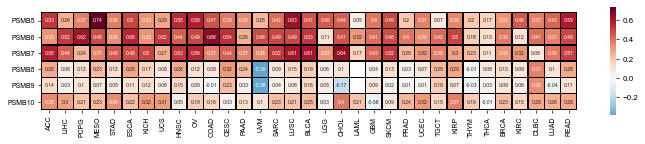

In [186]:
## Plotting the correlation heatmap of copy number and gene expression in tumor tissue types
fig=plt.figure(figsize=(12,2))
res=sns.heatmap(PSMB_corr_df.round(2).T,annot=True,xticklabels=True, yticklabels=True,annot_kws={"size":5},linewidths=0.5, linecolor='black',square=True,cmap="RdBu_r",center=0)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 7,rotation=0)
#plt.savefig('/workspace/projects/immunoproteasome/plots/'+'Copy_no_genes_correlation_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

In [187]:
## Mergeing dataframe for the copy number and gene expression at the tumor type level
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
frames1={}
frames1={}
for i in range(len(tumor_list)):  
    gene_data_frame=pd.read_csv(input_path1+tumor_list[i]+'.tsv',index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=np.log2(gene_data_frame+1)
    gene_data_frame=gene_data_frame.T
    dt_tmp=pd.merge(gene_data_frame,copy_no_df,left_index=True,right_index=True)
    dt_tmp1=dt_tmp[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','PSMB5_cn','PSMB6_cn','PSMB7_cn','PSMB8_cn','PSMB9_cn','PSMB10_cn']]
    frames1[i]=dt_tmp1
dff4=pd.concat(frames1)

### Supplementray figure 4B. Correlation between copy number and proteasome genes at the pancancer level.

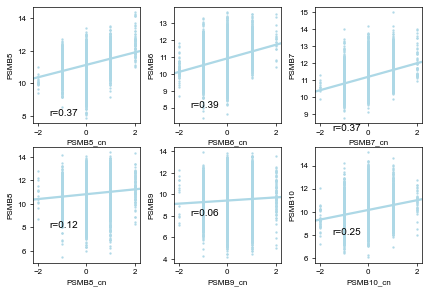

In [188]:
## Correlation plot between copy number and gene expression at the pan cancer level
fig, axs = plt.subplots(2,3)
fig.tight_layout()
sns.regplot(x=dff4['PSMB5_cn'], y=dff4['PSMB5'],scatter_kws={'s':2}, ax=axs[0,0],color = 'lightblue')
x=dff4['PSMB5_cn']
y=dff4['PSMB5']
coeff, _ = scipy.stats.spearmanr(x, y)
axs[0,0].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4['PSMB6_cn'], y=dff4['PSMB6'],scatter_kws={'s':2}, ax=axs[0,1],color = 'lightblue')
x=dff4['PSMB6_cn']
y=dff4['PSMB6']
coeff, _ = scipy.stats.spearmanr(x, y)
axs[0,1].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4['PSMB7_cn'], y=dff4['PSMB7'],scatter_kws={'s':2}, ax=axs[0,2],color = 'lightblue')
x=dff4['PSMB7_cn']
y=dff4['PSMB7']
coeff, _ = scipy.stats.spearmanr(x, y)
axs[0,2].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4['PSMB8_cn'], y=dff4['PSMB8'], scatter_kws={'s':2},ax=axs[1,0],color = 'lightblue')
x=dff4['PSMB8_cn']
y=dff4['PSMB8']
coeff, _ = scipy.stats.spearmanr(x, y)
axs[1,0].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4['PSMB9_cn'], y=dff4['PSMB9'], scatter_kws={'s':2},ax=axs[1,1],color = 'lightblue')
x=dff4['PSMB9_cn']
y=dff4['PSMB9']
coeff, _ = scipy.stats.spearmanr(x, y)
axs[1,1].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4['PSMB10_cn'], y=dff4['PSMB10'], scatter_kws={'s':2},ax=axs[1,2],color = 'lightblue')
x=dff4['PSMB10_cn']
y=dff4['PSMB10']
coeff, _ = scipy.stats.spearmanr(x, y)
axs[1,2].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

#plt.savefig('/workspace/projects/immunoproteasome/plots/'+'Copy_no_alteration_gene_expression_pan_cancer'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()


### Mutation analysis supplementary file

In [179]:
### Mutational data pancancer 
pan_cancer_data_frame_1=pd.read_csv("/workspace/shared/dataset/tcga_exome/mutations/data_parsed/PANCANCER.tsv.gz",sep="\t")
mutation_list=['missense_variant','stop_gained','frameshift_variant','inframe_deletion','inframe_insertion'] 
pan_cancer_data_frame_2=pan_cancer_data_frame_1
pan_cancer_data_frame_3=pan_cancer_data_frame_2.loc[pan_cancer_data_frame_2['Consequence'].isin(mutation_list)]
pan_cancer_data_frame_4=pan_cancer_data_frame_3[['Tumor_Sample_Barcode','tumor_tissue','Hugo_Symbol','Consequence','Protein_position','Amino_acids','Start_Position','End_Position','Chromosome']]
pan_cancer_data_frame_4['sample'] = pan_cancer_data_frame_4.apply(lambda row: ".".join(row['Tumor_Sample_Barcode'].split("-")[0:3]), axis=1)   

###removing hypermutated samples
tumor_mutation_df = pd.read_csv('/workspace/projects/immunoproteasome/data/tcga_cohort.txt', sep="\t",header = 0)
tumor_mutation_df['TMB']=tumor_mutation_df['total']/50
tumor_mutation_df=tumor_mutation_df[tumor_mutation_df['TMB']<10]
tumor_mutation_df['Tumor_Sample_Barcode']=tumor_mutation_df['Tumor_Sample_Barcode'].str.split('-').str[0:3].str.join('.')
tumor_mutation_df=tumor_mutation_df.set_index('Tumor_Sample_Barcode')
non_hypermutated_sample_id=list(tumor_mutation_df.index)

pan_cancer_data_frame_4_1=pan_cancer_data_frame_4[pan_cancer_data_frame_4['sample'].isin(non_hypermutated_sample_id)]
pan_cancer_data_frame_4_2=pan_cancer_data_frame_4_1.loc[pan_cancer_data_frame_4_1['Consequence'].isin(mutation_list)]
pan_cancer_data_frame_4_v1=pan_cancer_data_frame_4_2.set_index('sample')

##### Computing how often PSMB5/6/7/8/9/10 genes are mutated at the tumor level and at the pancancer level
APM_gene_list=['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"

frac_list=[] 
frac_list1=[] 
tumor_tissue_list=list(pan_cancer_data_frame_4['tumor_tissue'].unique())
c=[]
for i in range(len(tumor_tissue_list)): 
    gene_data_frame=pd.read_csv(input_path1+tumor_tissue_list[i]+'.tsv',sep='\t')
    gene_data_frame=gene_data_frame.set_index('Hybridization REF')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=np.log2(gene_data_frame.T[APM_gene_list]+1)
    mutation_gene_exp_df=pd.merge(pan_cancer_data_frame_4_v1, gene_data_frame, left_index=True, right_index=True)
    
    a=[]
    aa=[]
    for i in range(6):
        b=len(mutation_gene_exp_df.index.unique())
        a.append((mutation_gene_exp_df[mutation_gene_exp_df['Hugo_Symbol']==APM_gene_list[i]].shape[0]/b))
        aa.append((mutation_gene_exp_df[mutation_gene_exp_df['Hugo_Symbol']==APM_gene_list[i]].shape[0]))
    c.append(b)
    frac_list.append(a)
    frac_list1.append(aa)
mut_fraction_apm_genes=pd.DataFrame(frac_list,columns=APM_gene_list,index=tumor_tissue_list)   
mut_fraction_apm_genes1=pd.DataFrame(frac_list1,columns=APM_gene_list,index=tumor_tissue_list)  
mut_fraction_apm_genes.loc['all_samples']=mut_fraction_apm_genes1.sum()/sum(c)

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [178]:
## Writing it to the supplementary file TableS5
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/Table_S5.xlsx') as writer:  
    mut_fraction_apm_genes.to_excel(writer, sheet_name='Sheet_name_1')

In [180]:
mut_fraction_apm_genes

,PSMB5,PSMB6,PSMB7,PSMB8,PSMB9,PSMB10
GBM,0.000000,0.000000,0.000000,0.006667,0.000000,0.000000
OV,0.000000,0.000000,0.000000,0.000000,0.004902,0.000000
LUAD,0.000000,0.002410,0.000000,0.000000,0.000000,0.000000
LUSC,0.004762,0.002381,0.000000,0.009524,0.000000,0.000000
PRAD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
UCEC,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000
BLCA,0.005495,0.002747,0.010989,0.010989,0.008242,0.000000
TGCT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ESCA,0.000000,0.005650,0.000000,0.000000,0.000000,0.005650
PAAD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
